In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  os 

In [ ]:

# 1. Load preprocessed training and testing data

# Base path relative to the project 
Base_path = 'data'              # root data folder in the repo
processed_path = os.path.join(Base_path, 'processed')

# Optional: check available files in the processed folder
# print(os.listdir(processed_path))

# Load preprocessed train and test sets
df_Training = pd.read_csv(os.path.join(processed_path, "df_train.csv"), index_col=False)
df_Testing  = pd.read_csv(os.path.join(processed_path, "df_test.csv"), index_col=False)

print("Training shape :", df_Training.shape)
print("Testing shape  :", df_Testing.shape)

# Basic Data Exploration

In [4]:
# 1.assign the predefined column names

index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1, 22)]
col_names = index_names + setting_names + sensor_names

# --- 2. Apply the new column names ---
# Expected total number of columns (2 index + 3 settings + 21 sensors = 27)
expected_columns_count = len(col_names)

# Check whether both DataFrames have the correct number of columns
if len(df_Testing.columns) == expected_columns_count and len(df_Training.columns) == expected_columns_count:
    
    # Apply column names to both DataFrames
    df_Testing.columns = col_names
    df_Training.columns = col_names

    print("Column names successfully updated for df_Testing and df_Training.")
    print("\nPreview of df_Testing:")
    display(df_Testing.head())
    print("\nPreview of df_Training:")
    display(df_Training.head())

else:
    print("Error: Column count mismatch.")
    print(f"Expected: {expected_columns_count} columns.")
    print(f"df_Testing has: {len(df_Testing.columns)} columns.")
    print(f"df_Training has: {len(df_Training.columns)} columns.")


Column names successfully updated for df_Testing and df_Training.

Preview of df_Testing:


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130



Preview of df_Training:


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
train_df=df_Training.copy()


--- LIFETIME STATISTICS ---
count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_cycles, dtype: float64


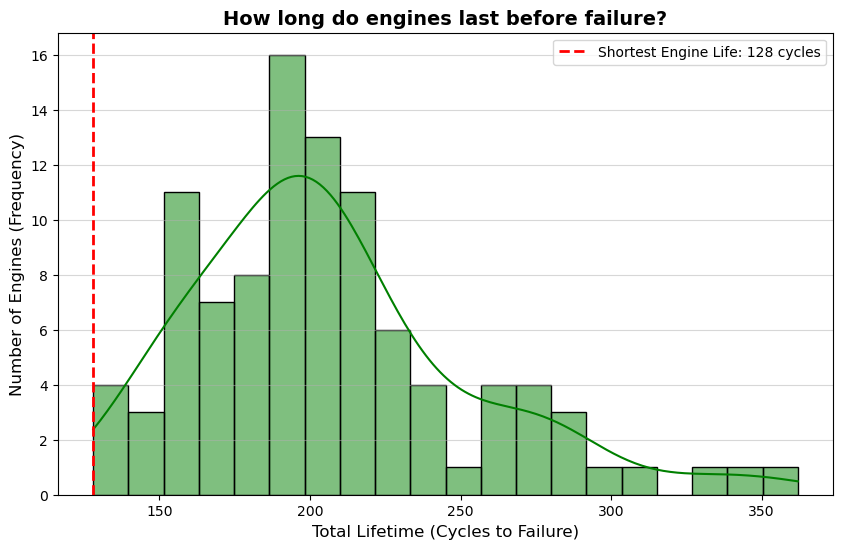

In [6]:
# --- A. ENGINE LIFETIME ANALYSIS ---
# Objective: Analyze engine lifetimes to verify if our 30-cycle window is safe.

# Calculate max cycle for each engine (its failure point)
engine_lifetimes = train_df.groupby('unit_nr')['time_cycles'].max()

print("\n--- LIFETIME STATISTICS ---")
print(engine_lifetimes.describe())

# Visualization
plt.figure(figsize=(10, 6))

# Histogram with Kernel Density Estimate (KDE)
sns.histplot(engine_lifetimes, kde=True, bins=20, color='green')

# 1. CLEAR TITLE: Asking the question directly
plt.title("How long do engines last before failure?", fontsize=14, fontweight='bold')

# 2. X-AXIS: Explicit description of the timeline
plt.xlabel("Total Lifetime (Cycles to Failure)", fontsize=12)

# 3. Y-AXIS: Clarifying that bars represent a count of units
plt.ylabel("Number of Engines (Frequency)", fontsize=12)

# The Red Line (The Technical Limit)
min_life = engine_lifetimes.min()
plt.axvline(min_life, color='red', linestyle='--', linewidth=2, label=f"Shortest Engine Life: {min_life} cycles")

plt.legend()
plt.grid(axis='y', alpha=0.5) # Add grid for easier reading of counts
plt.show()

### Distribution of Engine Lifetimes (Max Cycles)

This plot shows the distribution of maximum cycles reached by each engine in the FD001 dataset.  
The minimum lifetime observed is **128 cycles** (red dashed line).

The distribution confirms that:
- Engine lifetimes vary significantly (≈130 to 360 cycles),
- No engine has a lifespan below 128 cycles,


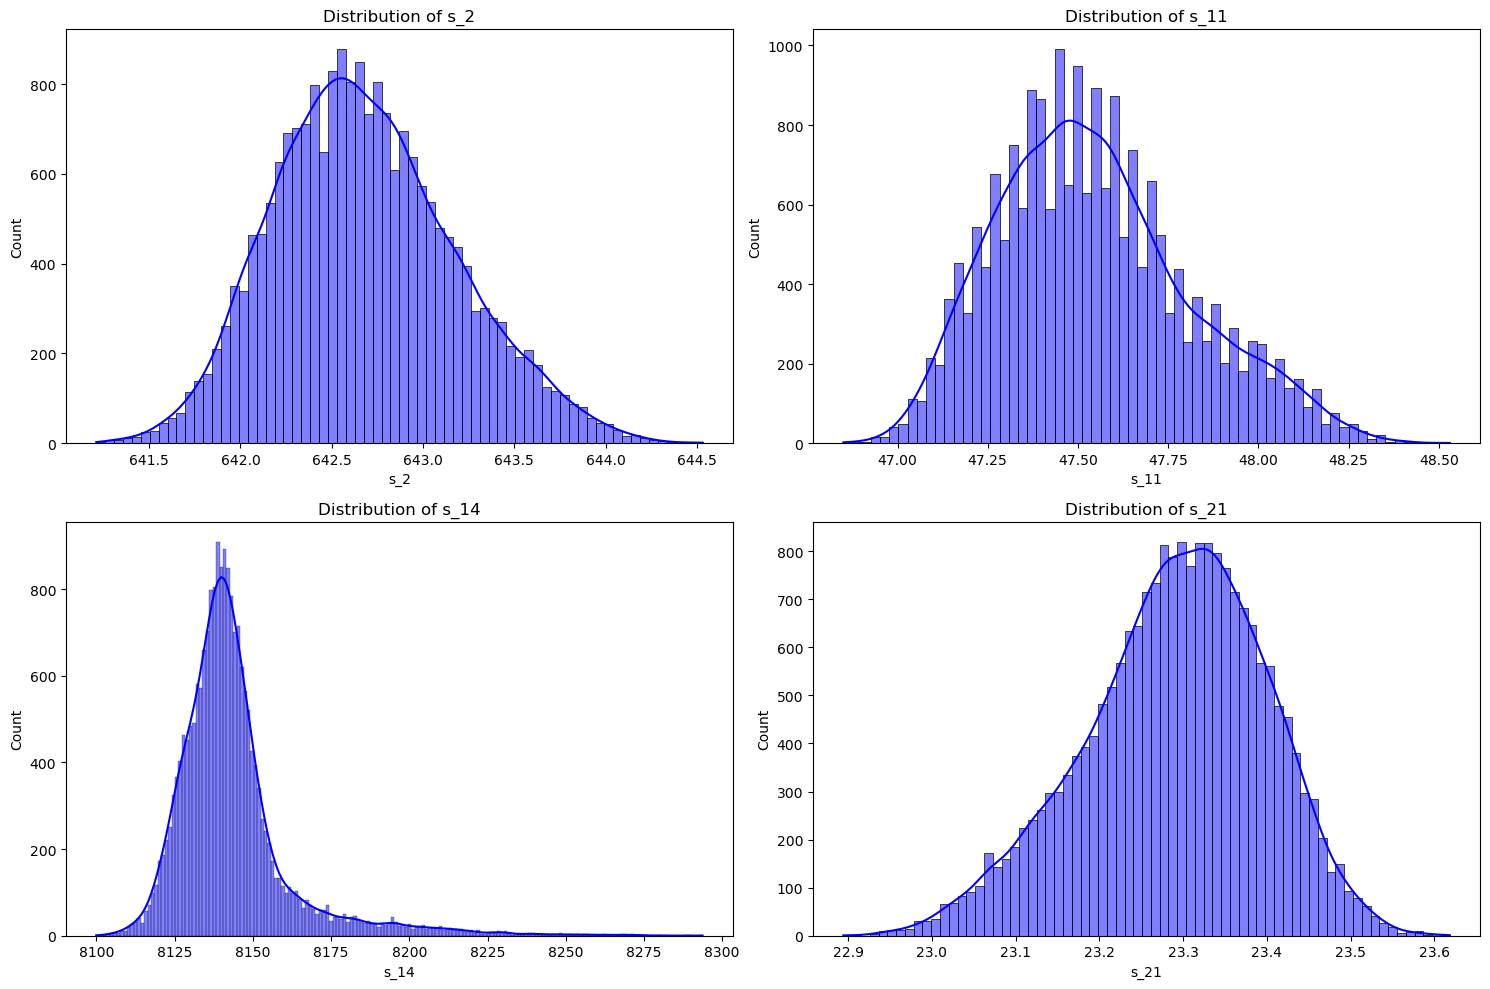

In [7]:
# --- C. DISTRIBUTION & OUTLIERS (Visual Check) ---
# Objective: Visualize the shape of data (Gaussian?) and spot outliers.
# We pick a few representative sensors to avoid plotting 21 graphs here.
sample_sensors = ['s_2', 's_11', 's_14', 's_21'] 

plt.figure(figsize=(15, 10))
for i, sensor in enumerate(sample_sensors):
    # Histogram / KDE
    plt.subplot(2, 2, i+1)
    sns.histplot(train_df[sensor], kde=True, color='blue')
    plt.title(f"Distribution of {sensor}")
    
plt.tight_layout()
plt.show()

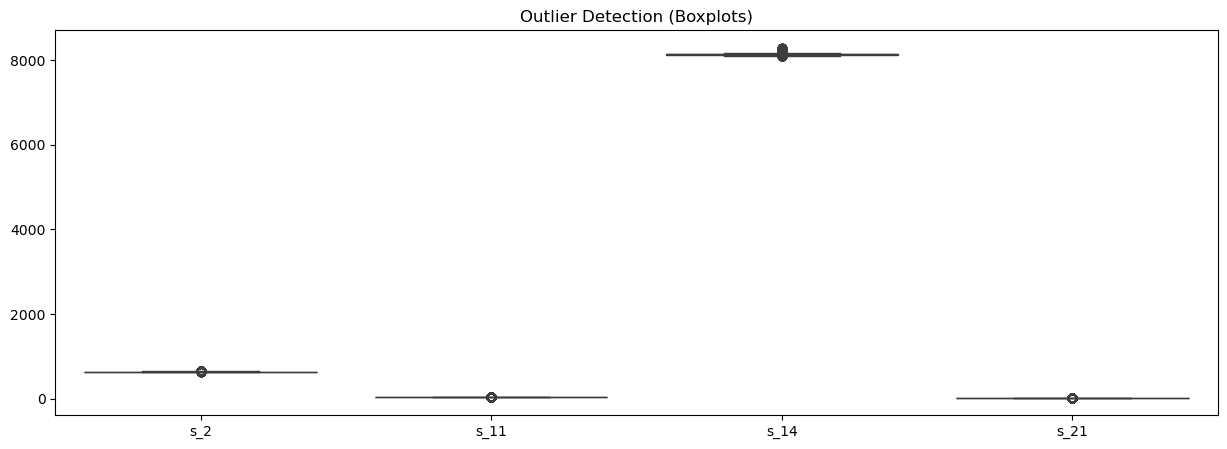

In [8]:

# Boxplots for the same sensors (to see outliers dots)
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df[sample_sensors])
plt.title("Outlier Detection (Boxplots)")
plt.show()


# **Hypothesis to verify :** 


# Variance Analysis
- Since the aircraft operates in steady cruise conditions, some sensors and operational settings remain nearly constant and therefore carry no useful information for predictive modeling.


In [9]:
df=train_df.copy()

In [10]:
# 2. VARIANCE ANALYSIS (Step 1)
# Compute the standard deviation (std) for each column
std_values = df.std()

# Sort features by increasing variance (to identify near-constant sensors)
print("\n--- STANDARD DEVIATION PER FEATURE (Sorted) ---")
print(std_values[setting_names + sensor_names].sort_values().head(26))



--- STANDARD DEVIATION PER FEATURE (Sorted) ---
setting_3    0.000000e+00
s_19         0.000000e+00
s_18         0.000000e+00
s_16         1.556432e-14
s_10         4.660829e-13
s_5          3.394700e-12
s_1          6.537152e-11
setting_2    2.930621e-04
s_6          1.388985e-03
setting_1    2.187313e-03
s_15         3.750504e-02
s_8          7.098548e-02
s_13         7.191892e-02
s_21         1.082509e-01
s_20         1.807464e-01
s_11         2.670874e-01
s_2          5.000533e-01
s_12         7.375534e-01
s_7          8.850923e-01
s_17         1.548763e+00
s_3          6.131150e+00
s_4          9.000605e+00
s_14         1.907618e+01
s_9          2.208288e+01
dtype: float64


Based on the variance analysis, the following features exhibit near-zero standard deviation and therefore carry no useful information for modeling.  
These settings and sensors remain constant across the entire dataset and will be removed:

- `setting_1`, `setting_2`, `setting_3`
- `s_1`, `s_5`, `s_6`, `s_10`, `s_16`, `s_18`, `s_19`

These features will be dropped during preprocessing since they do not contribute to degradation patterns or RUL prediction.

we noticed that some sensors — specifically **s_8, s_13, and s_15** — show relatively low variance.  
However, their variance is not low enough to justify removing them at this stage.  
We decided to postpone the decision until the correlation analysis could confirm their real contribution.

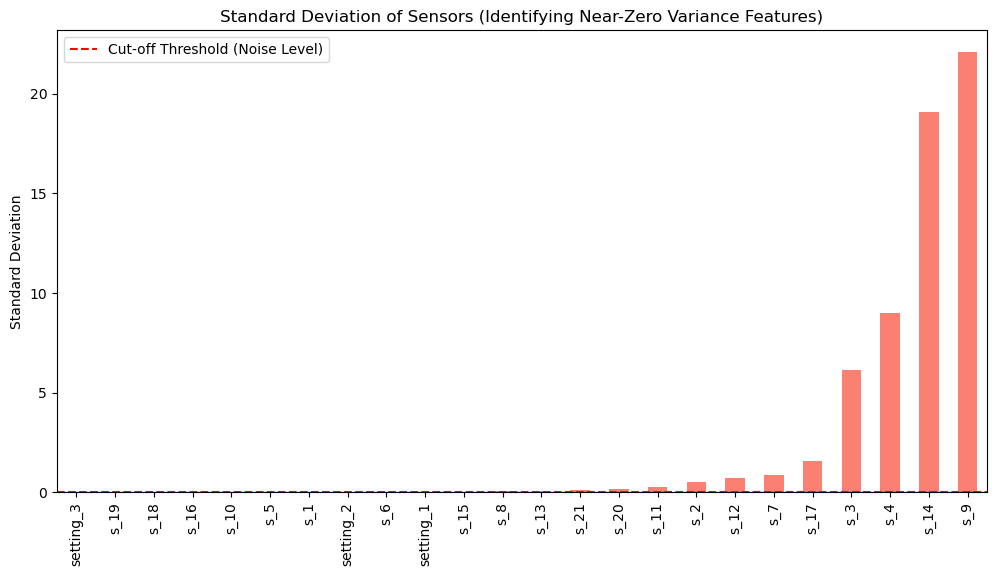

In [11]:
# 3. Visualization (To validate the hypothesis)
plt.figure(figsize=(12, 6))

# Plot the variance of all settings and sensors, sorted
std_values[setting_names + sensor_names].sort_values().plot(
    kind='bar',
    color='salmon'
)

plt.title("Standard Deviation of Sensors (Identifying Near-Zero Variance Features)")
plt.ylabel("Standard Deviation")

# Threshold line used to detect noise-level variance
plt.axhline(
    y=0.01,
    color='red',
    linestyle='--',
    label='Cut-off Threshold (Noise Level)'
)

plt.legend()
plt.show()


In [12]:
# Remove non-informative features (near-zero variance)
# These settings and sensors remain constant and do not contribute to RUL prediction.
cols_to_drop_variance = [
    'setting_1', 'setting_2', 'setting_3',
    's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19'
]

df_corr_clean = df.drop(cols_to_drop_variance, axis=1)


# Correlation Analysis
 - - Some signals might be redundant or highly correlated.


In [13]:
# 1. Prepare the full DataFrame (we must add RUL to compute correlations)
# Note: this code assumes that the training set is already loaded into `df`

# Recompute the RUL target for analysis purposes:
# For each engine, take its max cycle, then subtract the current cycle.
max_cycle = df_corr_clean.groupby('unit_nr')['time_cycles'].max().reset_index()
max_cycle.columns = ['unit_nr', 'max']

df_corr = df_corr_clean.merge(max_cycle, on=['unit_nr'], how='left')
df_corr['RUL'] = df_corr['max'] - df_corr['time_cycles']


In [14]:
# 2.compute correlations
corr_matrix = df_corr.corr()

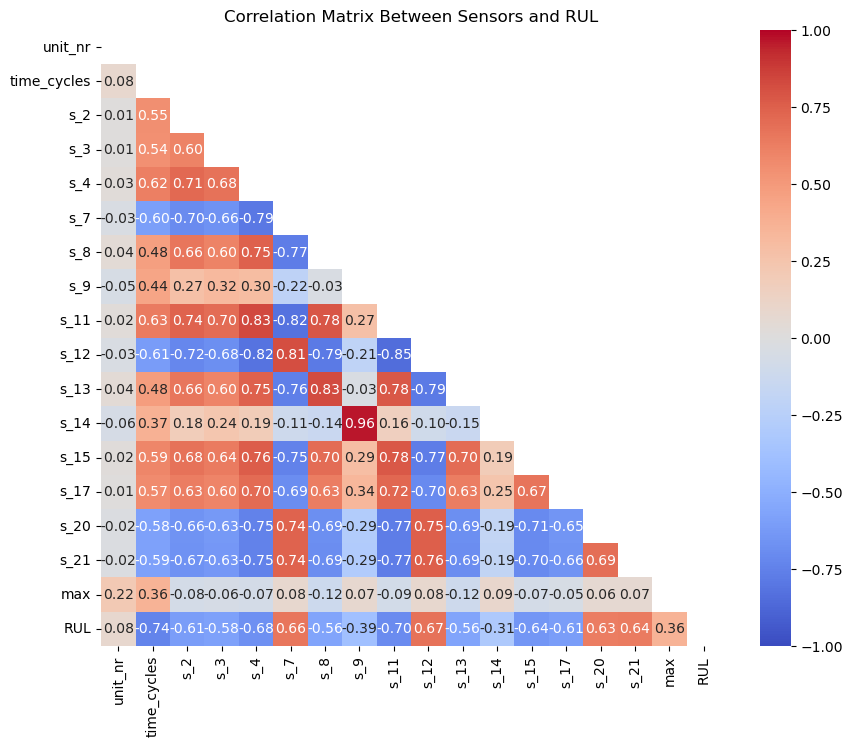

In [15]:
# 3. Visualization (Correlation Heatmap)
plt.figure(figsize=(10, 8))

# Mask the upper triangle for readability
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    mask=mask,
    fmt=".2f",
    vmin=-1,
    vmax=1
)

plt.title("Correlation Matrix Between Sensors and RUL")
plt.show()


### Correlation Matrix Between Sensors and RUL

This heatmap shows the pairwise correlations between all remaining sensors and the RUL target after removing the near-zero variance features.  
Key observations:

- **Strong negative correlations** (deep blue) indicate sensors that *decrease as the engine degrades* (e.g., `s_11`, `s_12`, `s_13`).  
  These sensors are highly informative for predicting RUL.

- **Strong positive correlations** (deep red) indicate sensors that *increase during degradation* (e.g., `s_14`, `s_9`).  
  They also provide meaningful degradation signals.

- Some sensors show **weak or inconsistent correlation**, suggesting limited predictive value.

This correlation analysis validates the sensors that truly evolve with engine wear and will be used for model training.


In [16]:
# 5. Focus on our "suspect" sensors (s_8, s_13, s_15) vs RUL
print("--- VERDICT FOR THE QUESTIONABLE SENSORS ---")
print(corr_matrix['RUL'][['s_8', 's_13', 's_15', 's_11']])  # s_11 added as a reference "good" sensor


--- VERDICT FOR THE QUESTIONABLE SENSORS ---
s_8    -0.563968
s_13   -0.562569
s_15   -0.642667
s_11   -0.696228
Name: RUL, dtype: float64


During the variance analysis, we identified several sensors with relatively low variance.  
However, their variance was not low enough to justify immediate removal.  
Therefore, we kept them for a second verification step using the correlation analysis.

The correlation results clearly show that sensors **s_8, s_13, s_15, and s_11** have a strong relationship with the RUL.

These sensors exhibit meaningful variations linked to engine degradation and therefore contribute useful information for RUL prediction.  
They should be kept in the final feature set.


# Visualization & Trend Analysis

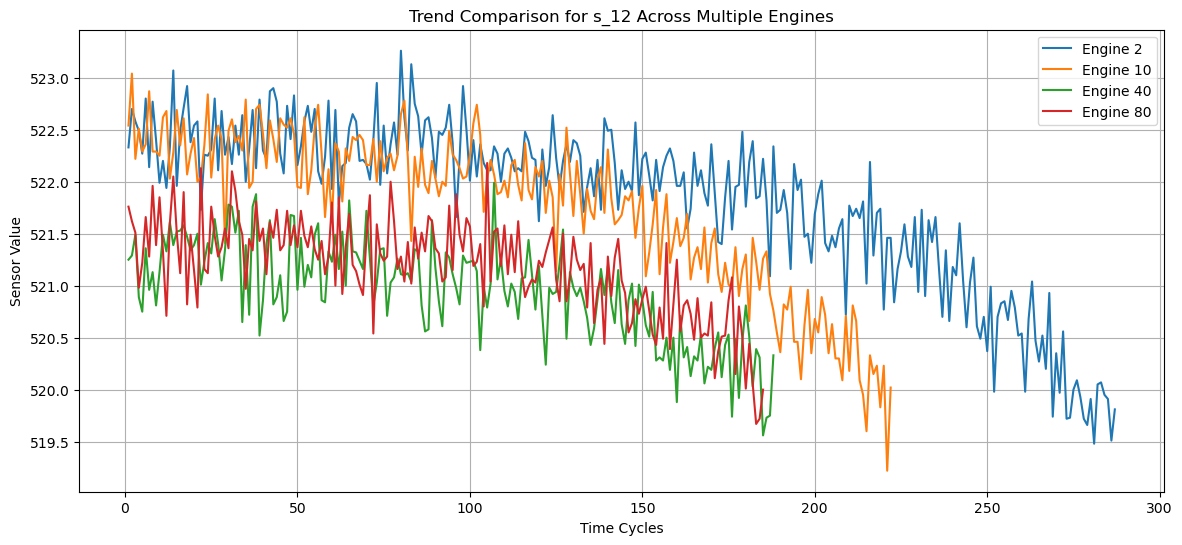

In [31]:
# ============================================================
# Multi-Engine Trend Comparison
# ============================================================

engines_to_plot = [2, 10, 40,80]  # change engines as needed
sensor_to_plot = 's_12'

plt.figure(figsize=(14, 6))

for e in engines_to_plot:
    e_df = df[df['unit_nr'] == e]
    plt.plot(e_df['time_cycles'], e_df[sensor_to_plot], label=f"Engine {e}")

plt.title(f"Trend Comparison for {sensor_to_plot} Across Multiple Engines")
plt.xlabel("Time Cycles")
plt.ylabel("Sensor Value")
plt.legend()
plt.grid(True)
plt.show()


The visualization of sensor s_12 across engines 2, 10, 40, and 80 reveals a clear downward trend as engines approach failure. However, intermittent spikes or upward deviations are noticeable. An increase in s_12 corresponds to higher bleed-air enthalpy (HPC outlet temperature), meaning the high-pressure compressor becomes less efficient.

This abnormal rise typically occurs when the compressor begins to degrade and must work harder to maintain pressure ratios. Therefore, upward fluctuations in s_12 serve as early indicators of engine performance deterioration and are critical for RUL prediction.


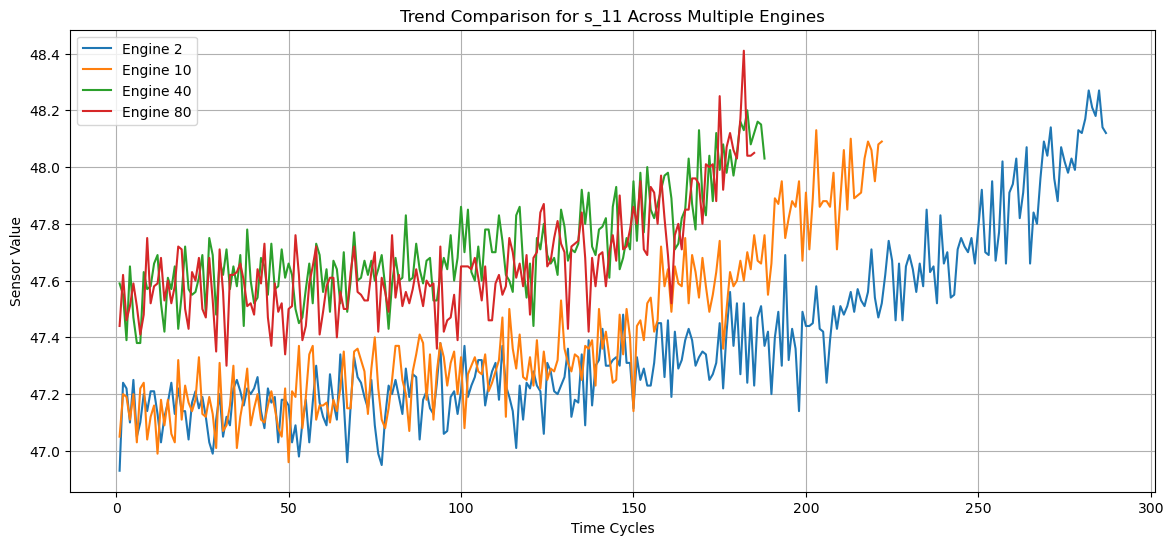

In [32]:
# ============================================================
# Multi-Engine Trend Comparison
# ============================================================

engines_to_plot = [2, 10, 40,80]  # change engines as needed
sensor_to_plot = 's_11'

plt.figure(figsize=(14, 6))

for e in engines_to_plot:
    e_df = df[df['unit_nr'] == e]
    plt.plot(e_df['time_cycles'], e_df[sensor_to_plot], label=f"Engine {e}")

plt.title(f"Trend Comparison for {sensor_to_plot} Across Multiple Engines")
plt.xlabel("Time Cycles")
plt.ylabel("Sensor Value")
plt.legend()
plt.grid(True)
plt.show()


The trend analysis of sensor s_11 (HPC outlet pressure) across engines 2, 10, 40, and 80 shows a clear upward drift as engines approach failure. This increase reflects the progressive loss of efficiency in the high-pressure compressor: as degradation accumulates, the compressor must produce higher outlet pressure to maintain performance.

Engines with shorter lifetimes exhibit earlier and sharper increases, while long-lived engines show a smoother progression. This makes s_11 a strong and reliable predictor for Remaining Useful Life (RUL), and it should be retained in the feature set.


# Train vs Test Distribution Comparison (Train vs Test)
“The test engines resemble the training engines.”

In [35]:
df_final=df_corr.copy()
test_df=df_Testing.copy()

Cleaned Train shape : (20631, 18)
Cleaned Test shape  : (13096, 16)


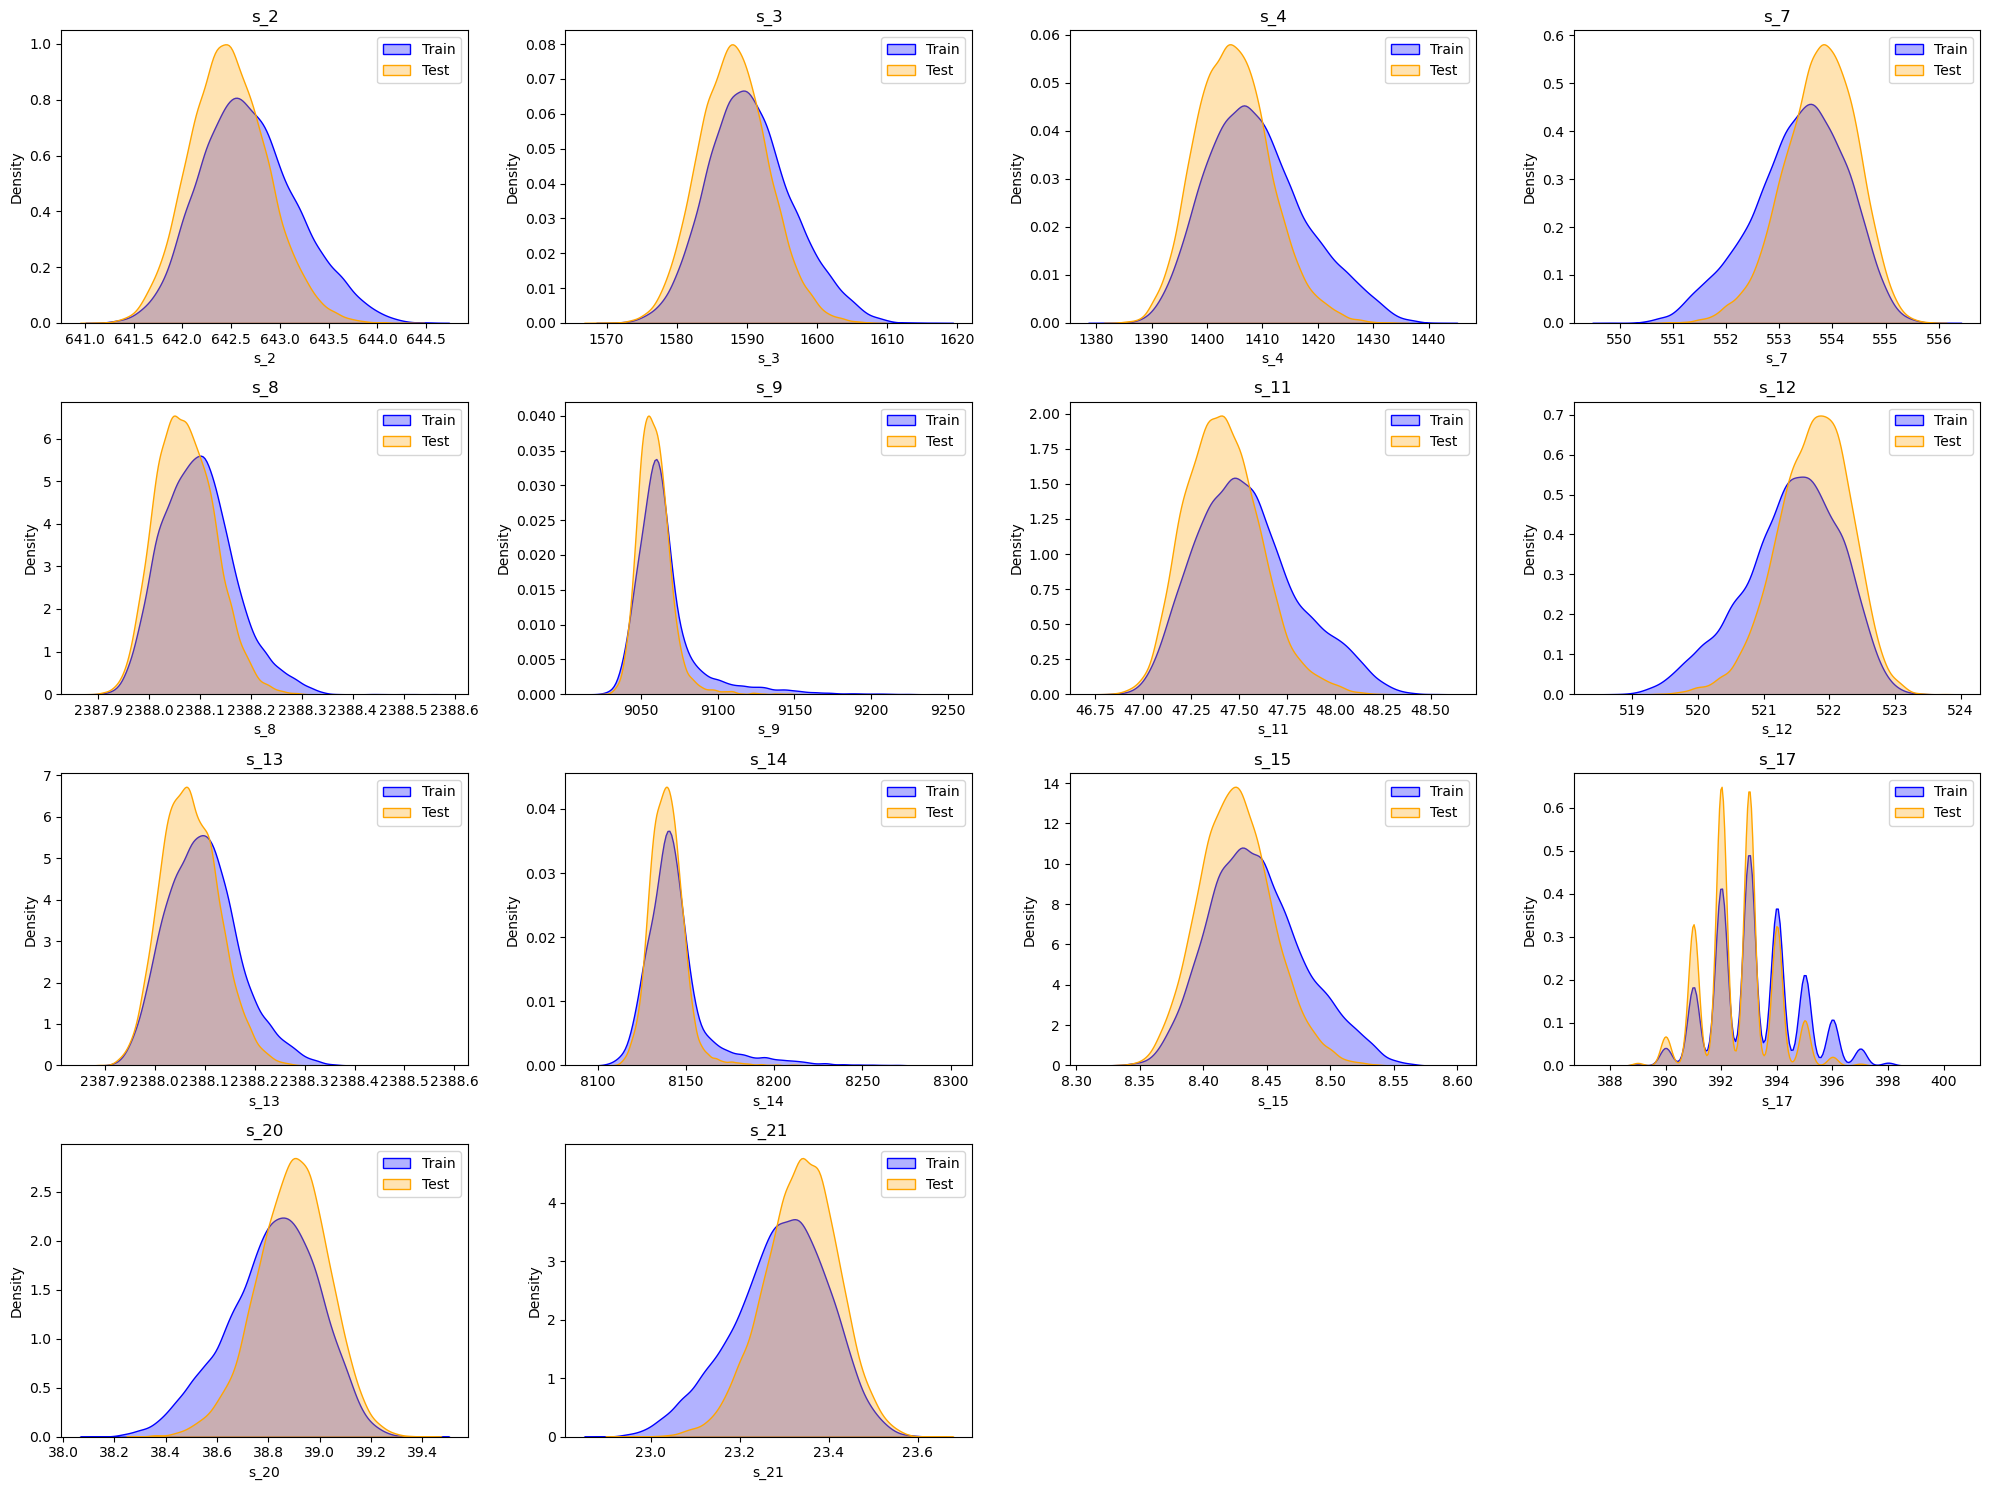

In [36]:

# These sensors passed both filters: variance analysis + correlation analysis.
sensors_to_keep = [
    's_2', 's_3', 's_4', 's_7', 's_8',
    's_9', 's_11', 's_12', 's_13', 's_14',
    's_15', 's_17', 's_20', 's_21'
]

# 2. Add the technical columns required for sequence construction
# (Engine ID and time are mandatory to build sliding windows.)
features_cols = ['unit_nr', 'time_cycles'] + sensors_to_keep

# 3. Clean the TEST set (apply the same feature selection as on TRAIN)
# We keep only 'unit_nr', 'time_cycles' and the 14 validated sensors.
# Note: features_cols = ['unit_nr', 'time_cycles'] + sensors_to_keep
test_df_clean = test_df[features_cols]

print(f"Cleaned Train shape : {df_final.shape}")
print(f"Cleaned Test shape  : {test_df_clean.shape}")

# 4. Train vs Test distribution comparison (KDE)
plt.figure(figsize=(20, 15))

# Loop over the 14 selected sensors
for i, sensor in enumerate(sensors_to_keep):
    plt.subplot(4, 4, i + 1)
    
    # TRAIN distribution (blue) - using df_final (cleaned train)
    sns.kdeplot(
        df_final[sensor],
        label="Train",
        color='blue',
        fill=True,
        alpha=0.3
    )
    
    # TEST distribution (orange) - using test_df_clean
    sns.kdeplot(
        test_df_clean[sensor],
        label="Test",
        color='orange',
        fill=True,
        alpha=0.3
    )
    
    plt.title(sensor)
    plt.legend()

plt.tight_layout()
plt.show()


- Afeter this visualization, we conclude that the train set and the test set share the same distribution shape.

## Trends_Degradation -- The Evidence of the (Knee Point)

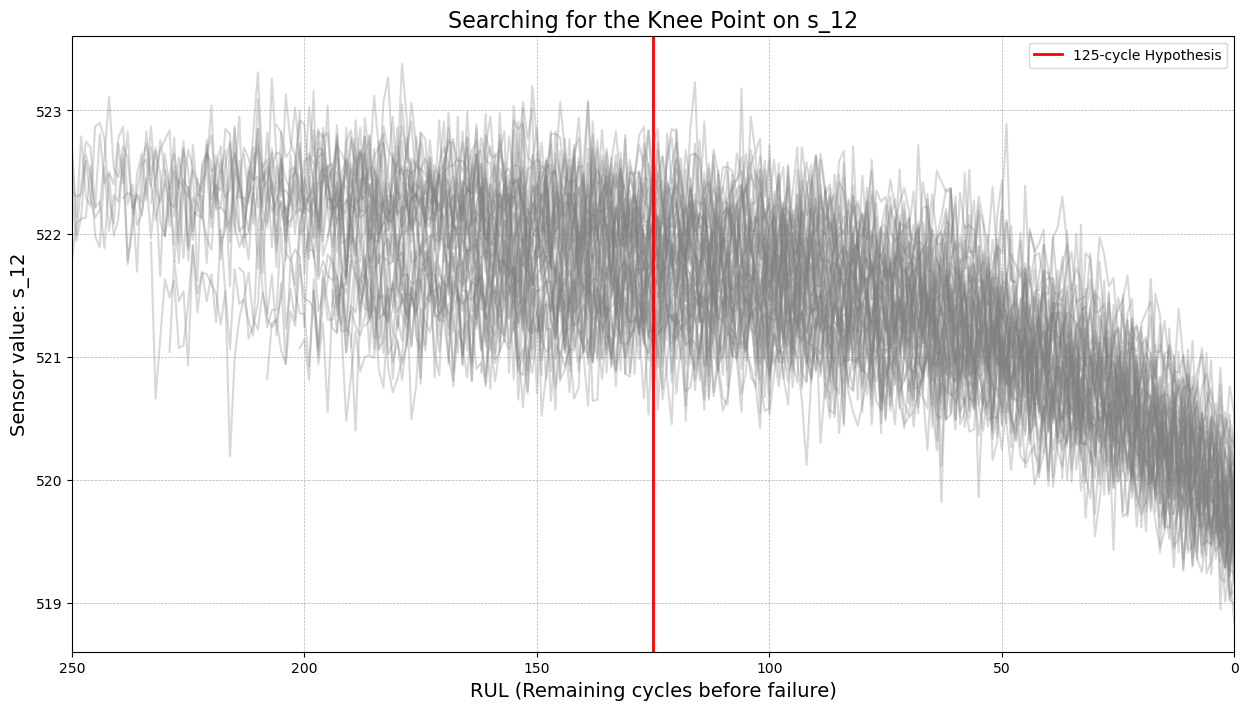

In [40]:

# 1. Select a "talkative" sensor (strongly correlated with RUL)
sensor_to_plot = 's_12'  # You can also try s_11, s_7, s_4

# 2. Prepare the figure
plt.figure(figsize=(15, 8))

# 3. Loop over the first 50 engines to avoid overloading the plot
for i in df_final['unit_nr'].unique()[:50]:
    
    # Extract data for this specific engine
    df_engine = df_final[df_final['unit_nr'] == i]
    
    # KEY TRICK: we plot against RUL (Remaining Cycles), not time_cycles.
    # This way, all engines are aligned at RUL = 0 (failure point).
    plt.plot(df_engine['RUL'], df_engine[sensor_to_plot], color='grey', alpha=0.3)

# 4. Invert the X-axis so that time flows from left (early life) to right (failure)
plt.xlim(250, 0)  # From "250 cycles remaining" down to "0 cycles remaining"

# Labels and title for better readability
plt.xlabel("RUL (Remaining cycles before failure)", fontsize=14)
plt.ylabel(f"Sensor value: {sensor_to_plot}", fontsize=14)
plt.title(f"Searching for the Knee Point on {sensor_to_plot}", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a vertical red line at 125 to visually check our hypothesis
plt.axvline(x=125, color='red', linestyle='-', linewidth=2, label="125-cycle Hypothesis")
plt.legend()

plt.show()


- The degradation becomes visible only during the last 120–130 cycles.

# Feature Reduction

#### Feature Reduction (Variance + Correlation Driven)

After the EDA, we apply a two-step feature reduction strategy:

1. **Variance Filter**  
   - Remove settings and sensors with near-zero variance  
   - These features remain almost constant and do not carry any degradation signal.  
   - Dropped features:  
     `setting_1`, `setting_2`, `setting_3`,  
     `s_1`, `s_5`, `s_6`, `s_10`, `s_16`, `s_18`, `s_19`.

2. **Correlation Check with RUL**  
   - Among the remaining sensors, we keep only those that show a meaningful correlation with RUL  
     (either positive or negative, but with clear physical justification).  

The final feature set contains **14 sensors** that survived both filters:

`s_2, s_3, s_4, s_7, s_8, s_9, s_11, s_12, s_13, s_14, s_15, s_17, s_20, s_21`

We also keep the technical identifiers:

- `unit_nr` (engine ID)  
- `time_cycles` (time index)

These columns are required later to build the sliding windows for sequence modeling.
